# Linear Regression for computer hardware performance evaluation

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
DATA_DIR = 'data'
FILE_NAME = 'machine.data.csv'

In [4]:
file_path = os.path.join(DATA_DIR, FILE_NAME)

In [5]:
df = pd.read_csv(
    file_path, 
    names=['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'],
    index_col='model_name'
)

In [6]:
df.shape

(209, 9)

In [7]:
df.head()

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
model_name,,,,,,,,,
32/60,adviser,125,256,6000,256,16,128,198,199
470v/7,amdahl,29,8000,32000,32,8,32,269,253
470v/7a,amdahl,29,8000,32000,32,8,32,220,253
470v/7b,amdahl,29,8000,32000,32,8,32,172,253
470v/7c,amdahl,29,8000,16000,32,8,16,132,132


In [8]:
df.nunique()

vendor_name     30
MYCT            60
MMIN            25
MMAX            23
CACH            22
CHMIN           15
CHMAX           31
PRP            116
ERP            104
dtype: int64

In [9]:
continuous_fields = ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']
target_fileds = ['PRP', 'ERP']

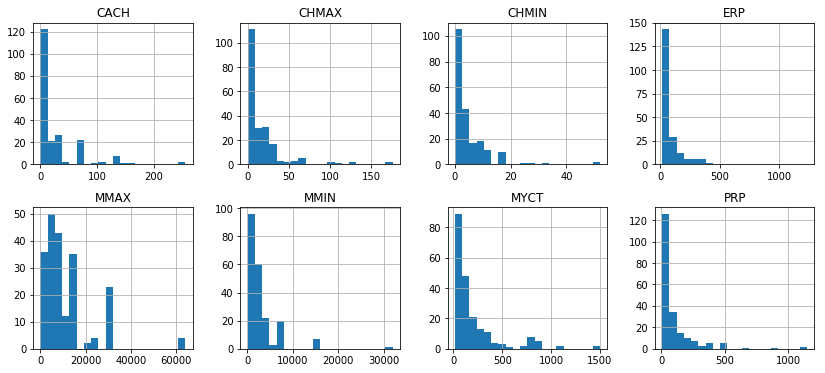

In [10]:
df[continuous_fields + target_fileds].hist(bins=20, layout=(2, 4), figsize=(14, 6))
plt.show()

### 1. Numeric attributes

In [11]:
X = df.loc[:, ~df.columns.isin(['vendor_name', 'PRP', 'ERP'])].values
y = df['PRP'].values

In [12]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (209, 6)
y.shape: (209,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (167, 6)
X_test.shape: (42, 6)
y_train.shape: (167,)
y_test.shape: (42,)


In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [18]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [19]:
print('MSE')
print('train: {:.3f}'.format(MSE_train))
print('test: {:.3f}'.format(MSE_test))

MSE
train: 3491.260
test: 3692.116


In [20]:
print('RMSE')
print('train: {:.3f}'.format(MSE_train ** 0.5))
print('test: {:.3f}'.format(MSE_test ** 0.5))

RMSE
train: 59.087
test: 60.763


### 2. All attributes

In [21]:
df = pd.get_dummies(data=df, columns=['vendor_name'], drop_first=True)

In [22]:
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,vendor_name_amdahl,vendor_name_apollo,vendor_name_basf,vendor_name_bti,vendor_name_burroughs,vendor_name_c.r.d,vendor_name_cambex,vendor_name_cdc,vendor_name_dec,vendor_name_dg,vendor_name_formation,vendor_name_four-phase,vendor_name_gould,vendor_name_harris,vendor_name_honeywell,vendor_name_hp,vendor_name_ibm,vendor_name_ipl,vendor_name_magnuson,vendor_name_microdata,vendor_name_nas,vendor_name_ncr,vendor_name_nixdorf,vendor_name_perkin-elmer,vendor_name_prime,vendor_name_siemens,vendor_name_sperry,vendor_name_sratus,vendor_name_wang
model_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32/60,125,256,6000,256,16,128,198,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470v/7,29,8000,32000,32,8,32,269,253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470v/7a,29,8000,32000,32,8,32,220,253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470v/7b,29,8000,32000,32,8,32,172,253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
470v/7c,29,8000,16000,32,8,16,132,132,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df.shape

(209, 37)

In [24]:
X = df.loc[:, ~df.columns.isin(['PRP', 'ERP'])].values
y = df['PRP'].values

In [25]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (209, 35)
y.shape: (209,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (167, 35)
X_test.shape: (42, 35)
y_train.shape: (167,)
y_test.shape: (42,)


In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [31]:
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [32]:
print('MSE')
print('train: {:.3f}'.format(MSE_train))
print('test: {:.3f}'.format(MSE_test))

MSE
train: 2374.564
test: 3577.769


In [33]:
print('RMSE')
print('train: {:.3f}'.format(MSE_train ** 0.5))
print('test: {:.3f}'.format(MSE_test ** 0.5))

RMSE
train: 48.729
test: 59.814


### 3. Printing predictions

In [34]:
y_test_summary = np.concatenate((y_test.reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1)

In [35]:
np.set_printoptions(precision=3, suppress=True)
y_test_summary

array([[ 72.   ,  82.556],
       [ 75.   , 104.608],
       [ 24.   ,  25.51 ],
       [ 36.   ,  31.424],
       [208.   , 247.584],
       [134.   , 119.854],
       [ 63.   , 148.888],
       [143.   , 140.678],
       [188.   , 265.3  ],
       [136.   , 238.926],
       [ 32.   ,  47.863],
       [132.   , 173.784],
       [ 20.   ,  50.786],
       [ 31.   , -75.22 ],
       [109.   ,  95.597],
       [214.   , 175.571],
       [ 25.   ,  23.032],
       [ 18.   ,  13.418],
       [ 71.   ,  84.691],
       [106.   , 247.318],
       [ 14.   ,  16.667],
       [368.   , 132.924],
       [ 32.   ,  87.297],
       [ 30.   ,  14.082],
       [ 36.   ,   7.76 ],
       [ 20.   ,  16.667],
       [ 40.   ,  40.484],
       [113.   , 124.606],
       [ 27.   ,  40.581],
       [214.   , 216.647],
       [  7.   ,   7.37 ],
       [ 25.   , -10.693],
       [ 12.   ,  13.418],
       [ 77.   ,  43.897],
       [ 19.   , -82.82 ],
       [465.   , 499.285],
       [173.   , 265.74 ],
 